In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline

In [2]:
df=pd.read_csv(r'C:\Users\Venkat Naresh\Downloads\Fraud.csv')

In [3]:
df.shape

(6362620, 11)

In [4]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [8]:
df=df.drop_duplicates()

In [9]:
df.shape

(6362620, 11)

In [10]:
df.head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [11]:
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [12]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

(array([2151495.,       0.,  532909.,       0.,       0., 2237500.,
              0.,   41432.,       0., 1399284.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

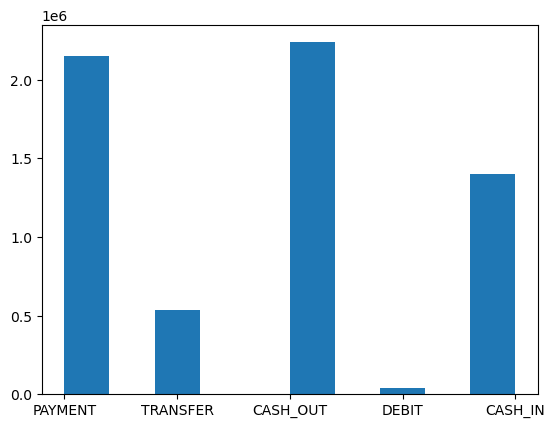

In [13]:
plt.hist(df['type'])

<AxesSubplot:>

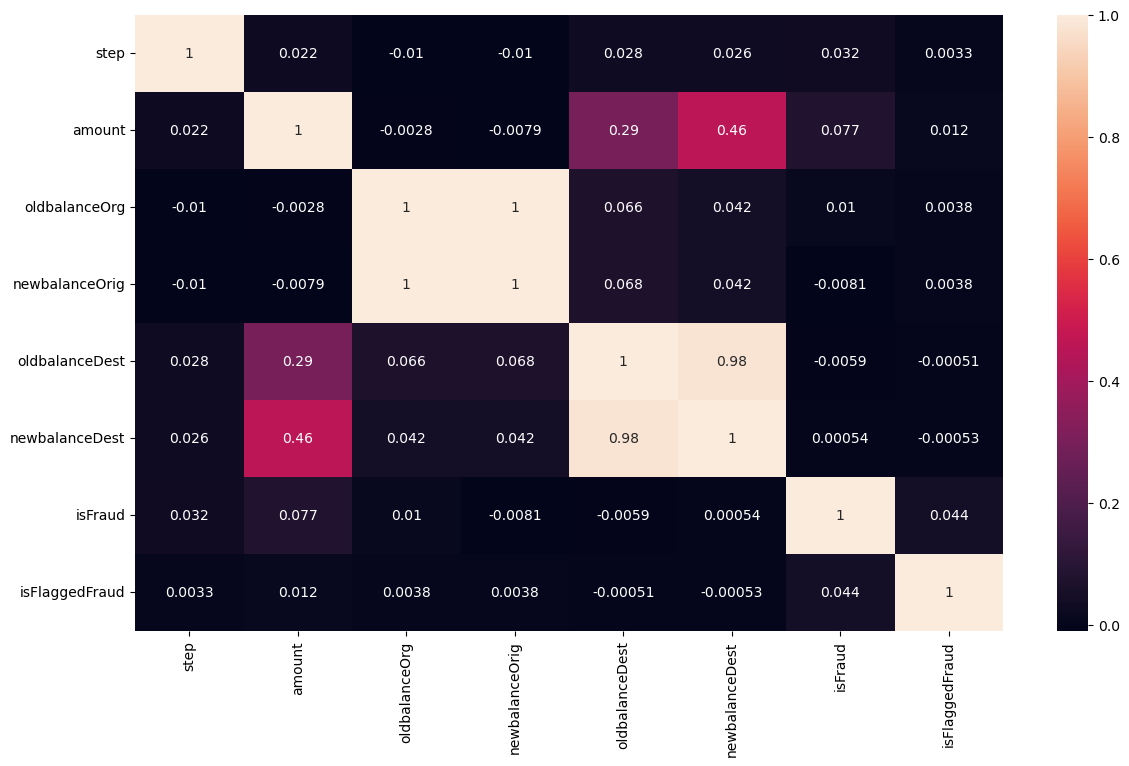

In [14]:
corr=df.corr()
plt.figure(figsize=(14,8))
sns.heatmap(corr,annot=True)

<AxesSubplot:ylabel='type'>

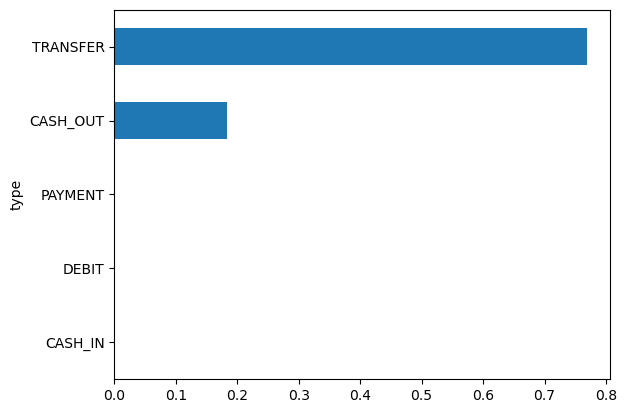

In [15]:
(df.groupby("type")["isFraud"].mean()*100).sort_values( ).plot(kind="barh")

In [16]:
df["type"]=df["type"].map({"CASH_IN":1,"DEBIT":2,"PAYMENT":3,"CASH_OUT":4,"TRANSFER":5})

In [17]:
objList =df.select_dtypes(include="object").columns
print (objList)

Index(['nameOrig', 'nameDest'], dtype='object')


In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for feat in objList:
    df[feat] = le.fit_transform(df[feat].astype(str))
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(2), int64(4)
memory usage: 534.0 MB
None


In [19]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.00,160296.36,1662094,0.00,0.00,0,0
1,1,3,1864.28,2188998,21249.00,19384.72,1733924,0.00,0.00,0,0
2,1,5,181.00,1002156,181.00,0.00,439685,0.00,0.00,1,0
3,1,4,181.00,5828262,181.00,0.00,391696,21182.00,0.00,1,0
4,1,3,11668.14,3445981,41554.00,29885.86,828919,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,4,339682.13,5651847,339682.13,0.00,505863,0.00,339682.13,1,0
6362616,743,5,6311409.28,1737278,6311409.28,0.00,260949,0.00,0.00,1,0
6362617,743,4,6311409.28,533958,6311409.28,0.00,108224,68488.84,6379898.11,1,0
6362618,743,5,850002.52,2252932,850002.52,0.00,319713,0.00,0.00,1,0


In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calvif(df):
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return(vif)
calvif(df)

,variables,VIF
0,step,3.413226
1,type,4.833180
2,amount,4.123604
3,nameOrig,3.455386
4,oldbalanceOrg,588.872487
5,newbalanceOrig,595.254673
6,nameDest,1.922948
7,oldbalanceDest,73.310316
8,newbalanceDest,85.088922
9,isFraud,1.198487


In [21]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.00,160296.36,1662094,0.00,0.00,0,0
1,1,3,1864.28,2188998,21249.00,19384.72,1733924,0.00,0.00,0,0
2,1,5,181.00,1002156,181.00,0.00,439685,0.00,0.00,1,0
3,1,4,181.00,5828262,181.00,0.00,391696,21182.00,0.00,1,0
4,1,3,11668.14,3445981,41554.00,29885.86,828919,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,4,339682.13,5651847,339682.13,0.00,505863,0.00,339682.13,1,0
6362616,743,5,6311409.28,1737278,6311409.28,0.00,260949,0.00,0.00,1,0
6362617,743,4,6311409.28,533958,6311409.28,0.00,108224,68488.84,6379898.11,1,0
6362618,743,5,850002.52,2252932,850002.52,0.00,319713,0.00,0.00,1,0


In [22]:
df.corr()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,-0.004744,0.022373,-0.000146,-0.010058,-0.010299,0.003767,0.027665,0.025888,0.031578,0.003277
type,-0.004744,1.000000,0.168113,0.000532,-0.446636,-0.466639,-0.035633,0.039592,0.096923,0.040947,0.002441
amount,0.022373,0.168113,1.000000,0.000124,-0.002762,-0.007861,-0.169150,0.294137,0.459304,0.076688,0.012295
nameOrig,-0.000146,0.000532,0.000124,1.000000,-0.000648,-0.000675,-0.000256,0.000245,0.000255,-0.000464,0.000667
oldbalanceOrg,-0.010058,-0.446636,-0.002762,-0.000648,1.000000,0.998803,-0.162688,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.466639,-0.007861,-0.000675,0.998803,1.000000,-0.166489,0.067812,0.041837,-0.008148,0.003776
nameDest,0.003767,-0.035633,-0.169150,-0.000256,-0.162688,-0.166489,1.000000,-0.198119,-0.203992,-0.021963,-0.001122
oldbalanceDest,0.027665,0.039592,0.294137,0.000245,0.066243,0.067812,-0.198119,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.096923,0.459304,0.000255,0.042029,0.041837,-0.203992,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.040947,0.076688,-0.000464,0.010154,-0.008148,-0.021963,-0.005885,0.000535,1.000000,0.044109


Class 0: 6354407
Class 1: 8213
Proportion of class 0 is  99.87 %


<AxesSubplot:title={'center':'Count (target)'}>

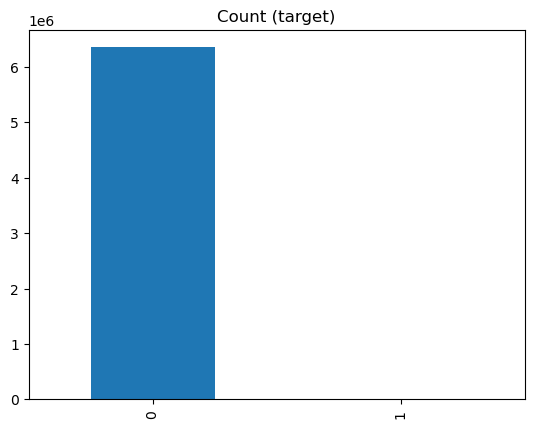

In [23]:
target_count=df.isFraud.value_counts()
print('Class 0:',target_count[0])
print('Class 1:',target_count[1])
print('Proportion of class 0 is ',round(target_count[0] * 100 / (target_count[1] + target_count[0]), 2),'%')
target_count.plot(kind='bar', title='Count (target)')

In [24]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.00,160296.36,1662094,0.00,0.00,0,0
1,1,3,1864.28,2188998,21249.00,19384.72,1733924,0.00,0.00,0,0
2,1,5,181.00,1002156,181.00,0.00,439685,0.00,0.00,1,0
3,1,4,181.00,5828262,181.00,0.00,391696,21182.00,0.00,1,0
4,1,3,11668.14,3445981,41554.00,29885.86,828919,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,4,339682.13,5651847,339682.13,0.00,505863,0.00,339682.13,1,0
6362616,743,5,6311409.28,1737278,6311409.28,0.00,260949,0.00,0.00,1,0
6362617,743,4,6311409.28,533958,6311409.28,0.00,108224,68488.84,6379898.11,1,0
6362618,743,5,850002.52,2252932,850002.52,0.00,319713,0.00,0.00,1,0


In [25]:
X = df[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFlaggedFraud']].values
y = df['isFraud'].values
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=7)

In [26]:
!pip install imblearn

     -------------------------------------- 226.0/226.0 kB 2.0 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [27]:
X_train.shape

(4453834, 6)

In [28]:
X_test.shape

(1908786, 6)

In [29]:
from imblearn.combine import SMOTEENN
smt = SMOTEENN(sampling_strategy='all')
X_smt,y_smt=smt.fit_resample(X_train,y_train)

In [30]:
import collections,numpy
counter=collections.Counter(y_smt)
counter

Counter({0: 4427036, 1: 4445546})

In [31]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
Scaler.fit(X_smt)
X_train=Scaler.transform(X_smt)
X_test=Scaler.transform(X_test)

In [32]:
from sklearn.linear_model import LogisticRegression 
logistic_regression= LogisticRegression() 
logistic_regression.fit(X_train,y_smt)
y_pred=logistic_regression.predict(X_test)

In [33]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
import collections,numpy
c1=collections.Counter(y_pred)
c1

Counter({0: 1850331, 1: 58455})

In [35]:
logistic_regression.predict_proba(X_test)

array([[7.83898723e-01, 2.16101277e-01],
       [1.00000000e+00, 1.68874666e-33],
       [8.28629446e-01, 1.71370554e-01],
       ...,
       [1.00000000e+00, 1.31204351e-12],
       [8.06692241e-01, 1.93307759e-01],
       [9.99999941e-01, 5.88852912e-08]])

In [36]:
logistic_regression.coef_

array([[ -79.09661774,  252.33874439, -213.95154327,   31.30212302,
         -36.16649498,   12.86861895]])

In [37]:
logistic_regression.intercept_

array([12.53097164])

In [38]:
!pip install scikit-plot

In [39]:
import scikitplot as skplt

In [40]:
from sklearn.metrics import roc_auc_score
y_train_pred=logistic_regression.predict_proba(X_train)
train_accuracy = roc_auc_score(y_smt,y_train_pred[:,-1])
print("Auroc score for train data is:",train_accuracy)

Auroc score for train data is: 0.9896052112177964


In [41]:
print("Auroc Score for test data is:",roc_auc_score(y_test,logistic_regression.predict_proba(X_test)[:, 1]))   

Auroc Score for test data is: 0.9865220857319189


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

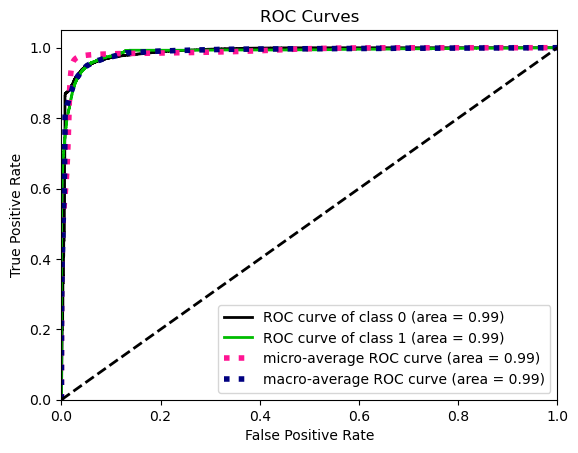

In [42]:
skplt.metrics.plot_roc(y_test,logistic_regression.predict_proba(X_test))

In [ ]:
1>Data cleaning is done.There is no missing values or null values in dataset.There is no need to check outliers as amount balance may be differ from one customer to another by great difference.Multicollinearity is present.

In [ ]:
2.The dataset is imbalanced dataset.So here we are balancing the dataset and applying the logistic regression.

In [ ]:
3.By using the correlation map and the data dictionary text file provided.

In [ ]:
4.Logistic regression is applied.

In [ ]:
5.Transaction details 

In [ ]:
7.Should not click unneccessary links in the sms we received or in internet.

In [ ]:
8.Checking the bank balance frequently and go through e-statemens